In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_train =pd.read_csv('/content/drive/MyDrive/File_DS/df_train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/File_DS/df_test.csv')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
df_train = df_train[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual', 'SalePrice']]
df_train

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8450,2003,7,5,1710,NaN,548,Gd,208500
1,9600,1976,6,8,1262,NaN,460,TA,181500
2,11250,2001,7,5,1786,NaN,608,Gd,223500
3,9550,1915,7,5,1717,NaN,642,Gd,140000
4,14260,2000,8,5,2198,NaN,836,Gd,250000
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA,175000
1456,13175,1978,6,6,2073,NaN,500,TA,210000
1457,9042,1941,7,9,2340,Shed,252,Gd,266500
1458,9717,1950,5,6,1078,NaN,240,Gd,142125


In [ ]:
df_test = df_test[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual']]
df_test

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,11622,1961,5,6,896,NaN,730.0,TA
1,14267,1958,6,6,1329,Gar2,312.0,Gd
2,13830,1997,5,5,1629,NaN,482.0,TA
3,9978,1998,6,6,1604,NaN,470.0,Gd
4,5005,1992,8,5,1280,NaN,506.0,Gd
...,...,...,...,...,...,...,...,...
1454,1936,1970,4,7,1092,NaN,0.0,TA
1455,1894,1970,4,5,1092,NaN,286.0,TA
1456,20000,1960,5,7,1224,NaN,576.0,TA
1457,10441,1992,5,5,970,Shed,0.0,TA


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LotArea      1460 non-null   int64 
 1   YearBuilt    1460 non-null   int64 
 2   OverallQual  1460 non-null   int64 
 3   OverallCond  1460 non-null   int64 
 4   GrLivArea    1460 non-null   int64 
 5   MiscFeature  54 non-null     object
 6   GarageArea   1460 non-null   int64 
 7   KitchenQual  1460 non-null   object
 8   SalePrice    1460 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 102.8+ KB


In [ ]:
df_train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [ ]:
df_train.describe()

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,6.099315,5.575342,1515.463699,472.980137,180921.195890
std,9981.264932,30.202904,1.382997,1.112799,525.480383,213.804841,79442.502883
min,1300.000000,1872.000000,1.000000,1.000000,334.000000,0.000000,34900.000000
25%,7553.500000,1954.000000,5.000000,5.000000,1129.500000,334.500000,129975.000000
50%,9478.500000,1973.000000,6.000000,5.000000,1464.000000,480.000000,163000.000000
75%,11601.500000,2000.000000,7.000000,6.000000,1776.750000,576.000000,214000.000000
max,215245.000000,2010.000000,10.000000,9.000000,5642.000000,1418.000000,755000.000000


## Distribusi target variable (SalePrice)

<Axes: xlabel='SalePrice', ylabel='Density'>

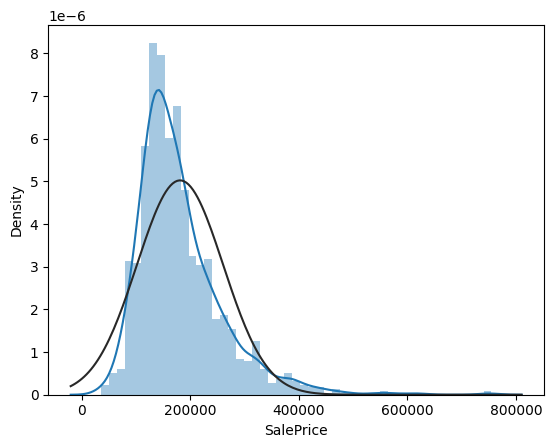

In [ ]:
sns.distplot(df_train['SalePrice'], fit = norm) # distribusi kolom SalePrice

In [ ]:
# hitung nilai skewness dan kurtosisnya
# skewness: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung miring atau tidak simetris
# Kurtosis: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung
# memiliki ekor panjang (outliers) dan puncak tajam (peakedness) dibandingkan dengan distribusi normal
# (distribusi Gauss atau distribusi berbentuk lonceng).

print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


## Scatterplot GrLivArea terhadap target variable (Sale Price)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

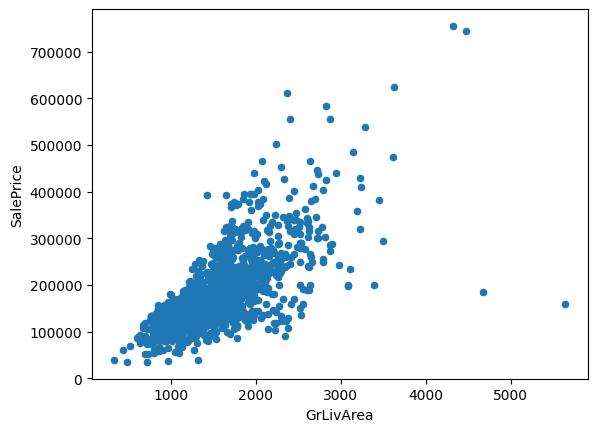

In [ ]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

In [ ]:
df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<200000)]

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
523,40094,2007,10,5,4676,NaN,884,Ex,184750
1298,63887,2008,10,5,5642,NaN,1418,Ex,160000


## Boxplot antara OverallQual dengan target variable (SalePrice)

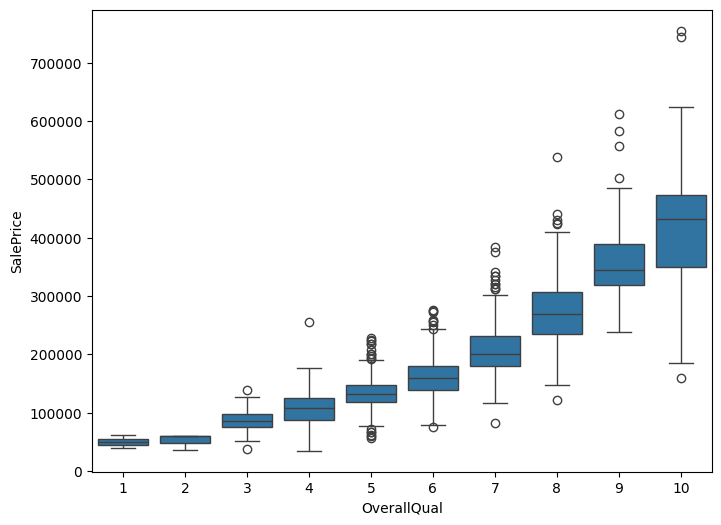

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

## Boxplot antara YearBuilt dengan target variable (SalePrice)

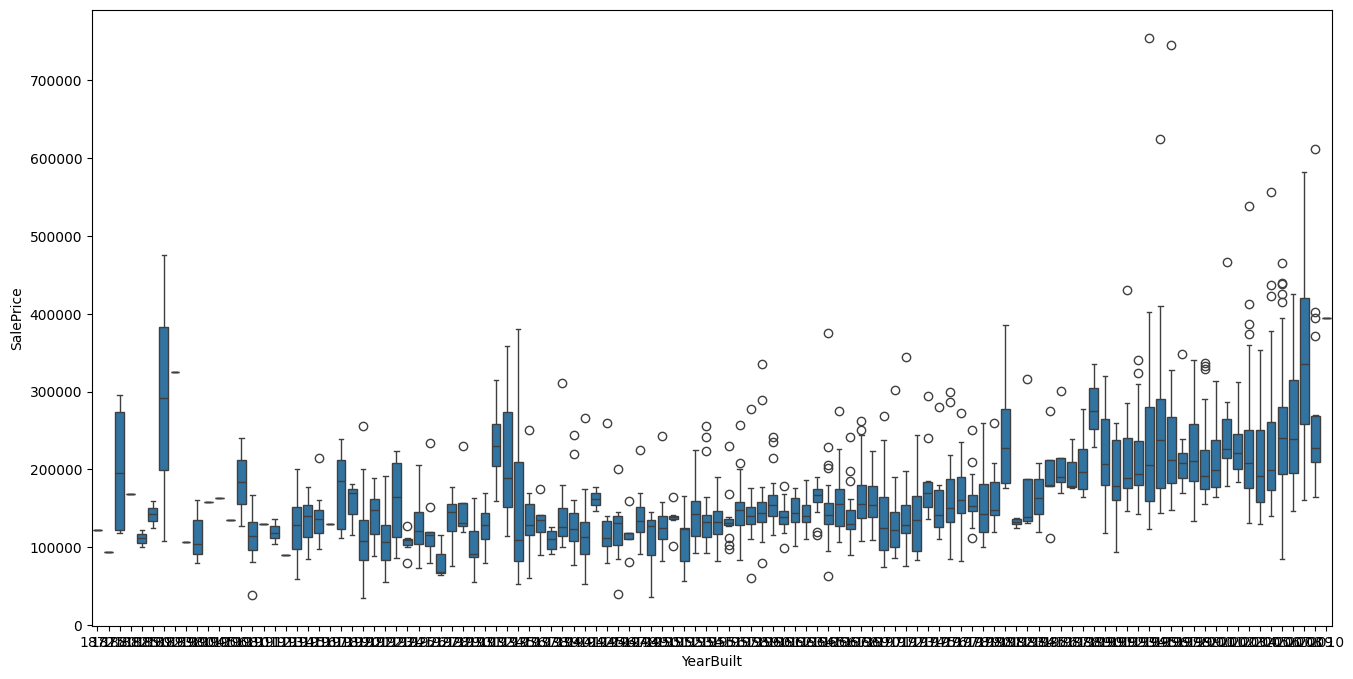

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)

In [ ]:
print(df_train['YearBuilt'].min(), df_train['YearBuilt'].max())

1872 2010


## Correlation map between variables

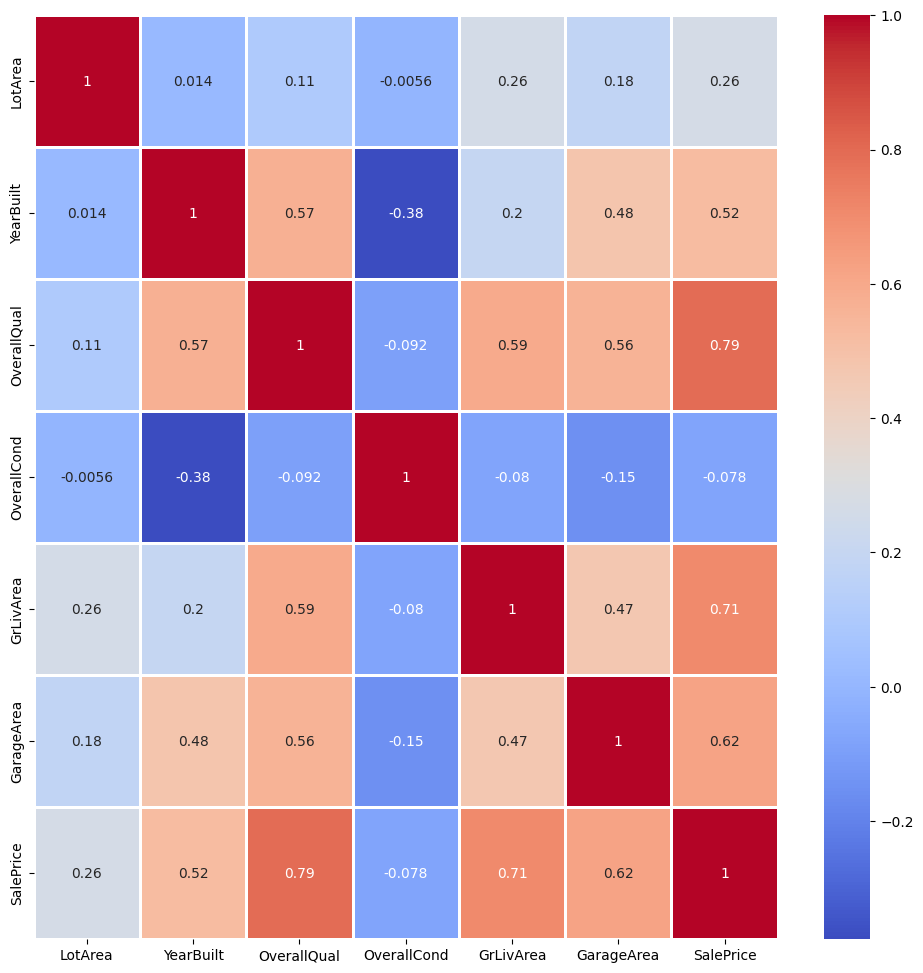

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(df_train.select_dtypes(exclude= 'object').corr(), cmap = "coolwarm", annot=True, linewidth=2)

## Menggabungkan train set dan test set

In [ ]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 8)


In [ ]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,NaN,548.0,Gd
1,9600,1976,6,8,1262,NaN,460.0,TA
2,11250,2001,7,5,1786,NaN,608.0,Gd
3,9550,1915,7,5,1717,NaN,642.0,Gd
4,14260,2000,8,5,2198,NaN,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,NaN,0.0,TA
2915,1894,1970,4,5,1092,NaN,286.0,TA
2916,20000,1960,5,7,1224,NaN,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


## Analisis dan Imputasi Missing Value

In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MiscFeature,2814,96.402878
GarageArea,1,0.034258
KitchenQual,1,0.034258
LotArea,0,0.000000
OverallCond,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000
GrLivArea,0,0.000000


In [ ]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('NA') # isi baris yg kolom MiscFeature nya null dg 'NA'

In [ ]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [ ]:
all_data['KitchenQual'].value_counts()

,count
KitchenQual,
TA,1492
Gd,1151
Ex,205
Fa,70


In [ ]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) # mengisi 1 baris yg null dg nilai 'TA'

In [ ]:
#Check remaining missing values if any
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 182.6+ KB


In [ ]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,NA,548.0,Gd
1,9600,1976,6,8,1262,NA,460.0,TA
2,11250,2001,7,5,1786,NA,608.0,Gd
3,9550,1915,7,5,1717,NA,642.0,Gd
4,14260,2000,8,5,2198,NA,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,NA,0.0,TA
2915,1894,1970,4,5,1092,NA,286.0,TA
2916,20000,1960,5,7,1224,NA,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


## Label Encoding untuk kolom KitchenQual

In [ ]:
tmp_data = all_data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['KitchenQual'] #masih sisa 'MiscFeature'
encoders = {}

for c in cols:
  lbl = LabelEncoder()
  lbl.fit(list(tmp_data[c].values))
  tmp_data[c] = lbl.transform(list(tmp_data[c].values))
  encoders[c] = lbl

print('Shape tmp_data: {}'.format(tmp_data.shape))

Shape tmp_data: (2919, 8)


In [ ]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,NA,548.0,2
1,9600,1976,6,8,1262,NA,460.0,3
2,11250,2001,7,5,1786,NA,608.0,2
3,9550,1915,7,5,1717,NA,642.0,2
4,14260,2000,8,5,2198,NA,836.0,2
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,NA,0.0,3
2915,1894,1970,4,5,1092,NA,286.0,3
2916,20000,1960,5,7,1224,NA,576.0,3
2917,10441,1992,5,5,970,Shed,0.0,3


## One-Hot Encoding untuk kolom MiscFeature

In [ ]:
tmp_data['MiscFeature'].value_counts()

,count
MiscFeature,
NA,2814
Shed,95
Gar2,5
Othr,4
TenC,1


In [ ]:
tmp_data = pd.get_dummies(tmp_data, drop_first=True) # one hot encoding untuk MiscFeature di dataset
print(tmp_data.shape)

(2919, 11)


In [ ]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,8450,2003,7,5,1710,548.0,2,True,False,False,False
1,9600,1976,6,8,1262,460.0,3,True,False,False,False
2,11250,2001,7,5,1786,608.0,2,True,False,False,False
3,9550,1915,7,5,1717,642.0,2,True,False,False,False
4,14260,2000,8,5,2198,836.0,2,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,0.0,3,True,False,False,False
2915,1894,1970,4,5,1092,286.0,3,True,False,False,False
2916,20000,1960,5,7,1224,576.0,3,True,False,False,False
2917,10441,1992,5,5,970,0.0,3,False,False,True,False


In [ ]:
one_hot_columns = tmp_data.columns
one_hot_columns

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea',
       'GarageArea', 'KitchenQual', 'MiscFeature_NA', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object')

## Scaling

In [ ]:
# menggunakan robust scaler untuk mengurangi dampak outlier di tiap kolom
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(tmp_data)
tmp_data = scaler.transform(tmp_data)

In [ ]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.245112,0.631579,0.5,0.0,0.430769,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035924,0.063158,0.0,3.0,-0.294737,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.439150,0.589474,0.5,0.0,0.553846,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023705,-1.221053,0.5,0.0,0.442105,0.632812,-1.0,0.0,0.0,0.0,0.0
4,1.174731,0.568421,1.0,0.0,1.221053,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,-1.836999,-0.063158,-1.0,2.0,-0.570040,-1.875000,0.0,0.0,0.0,0.0,0.0
2915,-1.847263,-0.063158,-1.0,0.0,-0.570040,-0.757812,0.0,0.0,0.0,0.0,0.0
2916,2.577468,-0.273684,-0.5,2.0,-0.356275,0.375000,0.0,0.0,0.0,0.0,0.0
2917,0.241447,0.400000,-0.5,0.0,-0.767611,-1.875000,0.0,-1.0,0.0,1.0,0.0


## Split Data Training dan Data Testing

In [ ]:
X_train = tmp_data[:ntrain]
X_test = tmp_data[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 11), (1459, 11), (1460,))

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.245112,0.631579,0.5,0.0,0.430769,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035924,0.063158,0.0,3.0,-0.294737,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.439150,0.589474,0.5,0.0,0.553846,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023705,-1.221053,0.5,0.0,0.442105,0.632812,-1.0,0.0,0.0,0.0,0.0
4,1.174731,0.568421,1.0,0.0,1.221053,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.375367,0.547368,0.0,0.0,0.328745,-0.078125,0.0,0.0,0.0,0.0,0.0
1456,0.909580,0.105263,0.0,1.0,1.018623,0.078125,0.0,0.0,0.0,0.0,0.0
1457,-0.100440,-0.673684,0.5,4.0,1.451012,-0.890625,-1.0,-1.0,0.0,1.0,0.0
1458,0.064516,-0.484211,-0.5,1.0,-0.592713,-0.937500,-1.0,0.0,0.0,0.0,0.0


## Modeling

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# fungsi untuk melakukan cross validation
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 5, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)

    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

## Linear Regression

In [ ]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[np.float64(0.7720817889167811)]

## Lasso Regression

In [ ]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[np.float64(0.7720818001737464)]

## XGBoost

In [ ]:
!pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.1.2
    Uninstalling xgboost-3.1.2:
      Successfully uninstalled xgboost-3.1.2


In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[np.float64(0.8063417434692383)]

In [ ]:
model = xgb_reg.fit(X_train, y_train) # training model xgboost

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)

print(f"Train R²: {r2_train:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")

Train R²: 0.9968
Train MSE: 20122024.0000
Train RMSE: 4485.7578


## Coba Prediksi Data Baru dengan Model XGBoost (karena nilai r2-nya paling tinggi dibanding algoritma yg lain)

In [ ]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.245112,0.631579,0.5,0.0,0.430769,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035924,0.063158,0.0,3.0,-0.294737,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.439150,0.589474,0.5,0.0,0.553846,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023705,-1.221053,0.5,0.0,0.442105,0.632812,-1.0,0.0,0.0,0.0,0.0
4,1.174731,0.568421,1.0,0.0,1.221053,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,-1.836999,-0.063158,-1.0,2.0,-0.570040,-1.875000,0.0,0.0,0.0,0.0,0.0
2915,-1.847263,-0.063158,-1.0,0.0,-0.570040,-0.757812,0.0,0.0,0.0,0.0,0.0
2916,2.577468,-0.273684,-0.5,2.0,-0.356275,0.375000,0.0,0.0,0.0,0.0,0.0
2917,0.241447,0.400000,-0.5,0.0,-0.767611,-1.875000,0.0,-1.0,0.0,1.0,0.0


In [ ]:
model.predict(tmp_data[2].reshape(1,-1))

array([221020.72], dtype=float32)

In [ ]:
df_train

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8450,2003,7,5,1710,NaN,548,Gd,208500
1,9600,1976,6,8,1262,NaN,460,TA,181500
2,11250,2001,7,5,1786,NaN,608,Gd,223500
3,9550,1915,7,5,1717,NaN,642,Gd,140000
4,14260,2000,8,5,2198,NaN,836,Gd,250000
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA,175000
1456,13175,1978,6,6,2073,NaN,500,TA,210000
1457,9042,1941,7,9,2340,Shed,252,Gd,266500
1458,9717,1950,5,6,1078,NaN,240,Gd,142125


In [ ]:
# nyoba input data baru untuk diprediksi berapa harga rumahnya
data_baru = {'LotArea': [8000],
             'YearBuilt':[2010],
             'OverallQual':['8'],
             'OverallCond':['7'],
             'GrLivArea':[2000],
            'MiscFeature':['Shed'],
             'GarageArea': [500],
             'KitchenQual': ['Gd']}

In [ ]:
tmp = pd.DataFrame(data_baru)
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8000,2010,8,7,2000,Shed,500,Gd


In [ ]:
data_baru_tf = data_baru.copy()

In [ ]:
data_baru_tf['KitchenQual'] = encoders['KitchenQual'].transform(tmp['KitchenQual'])[0]

In [ ]:
tmp = pd.DataFrame(data_baru_tf)

In [ ]:
tmp = pd.get_dummies(tmp, columns = ['MiscFeature'])
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_Shed
0,8000,2010,8,7,2000,500,2,True


In [ ]:
one_hot_columns

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea',
       'GarageArea', 'KitchenQual', 'MiscFeature_NA', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object')

In [ ]:
# Menambahkan kolom-kolom yang hilang pada data baru
for col in one_hot_columns:
    if col not in tmp.columns:
        tmp[col] = 0

In [ ]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_Shed,MiscFeature_NA,MiscFeature_Othr,MiscFeature_TenC
0,8000,2010,8,7,2000,500,2,True,0,0,0


In [ ]:
# jangan lupa lakukan scaling
tmp_scaled = scaler.transform(tmp.loc[0].values.reshape(1,-1))
pd.DataFrame(tmp_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.355083,0.778947,1.0,2.0,0.900405,0.078125,-1.0,0.0,0.0,0.0,0.0


In [ ]:
y = (model.predict(tmp_scaled))
print(y) # harga rumah hasil prediksi untuk data baru

[300698.47]


In [ ]:
data_baru['SalePrice'] = y
pd.DataFrame(data_baru)

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8000,2010,8,7,2000,Shed,500,Gd,300698.46875
